**ReadMe**

The question 1 is answered in part 1.

The question 2 is answered in part 3.

The question 4 is answered in part 2.

The question 3 is answered in part 4. (unfinished)

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
%cd /content/drive/My\ Drive/Winter\ 2022/CME241

Mounted at /content/drive
/content/drive/My Drive/Winter 2022/CME241


In [2]:
from rl.distribution import *
from rl.markov_process import *
from rl.markov_decision_process import *
from rl.policy import *
from rl.dynamic_programming import *
from scipy.stats import poisson

import matplotlib.pyplot as plt
import time

#1. Manual Value Iteration

Consider the formulation of the problem.

\begin{align*}
  \mathcal{S} &= \{s_1, s_2, s_3\}\\
  \mathcal{N} &= \{s_1, s_2\}\\
  \mathcal{A} &= \{a_1, a_2\}\\
  p(s_1,a_1,s_1) &= 0.2\\
  p(s_1,a_1,s_2) &= 0.6\\
  p(s_1,a_1,s_3) &= 0.2\\
  p(s_1,a_2,s_1) &= 0.1\\
  p(s_1,a_2,s_2) &= 0.2\\
  p(s_1,a_2,s_3) &= 0.7\\
  p(s_2,a_1,s_1) &= 0.3\\
  p(s_2,a_1,s_2) &= 0.3\\
  p(s_2,a_1,s_3) &= 0.4\\
  p(s_2,a_2,s_1) &= 0.5\\
  p(s_2,a_2,s_2) &= 0.3\\
  p(s_2,a_2,s_3) &= 0.2\\
  \mathcal{R}(s_1,a_1) &= 8.0\\
  \mathcal{R}(s_1,a_2) &= 10.0\\
  \mathcal{R}(s_2,a_1) &= 1.0\\
  \mathcal{R}(s_2,a_2) &= -1.0\\
  \gamma &= 1
\end{align*}

Let initialize the value function $v_0$ to be
\begin{align*}
  v_0(s_1) &= 10.0\\
  v_0(s_2) &= 1.0\\
  v_0(s_3) &= 0.0
\end{align*}

Next, we will look into the transition into $q_k, v_k$. According to the structure of tghe reward, $v_k(s_3)$ will always be $0.0$.

Consider that
\begin{align*}
  q_k(s, a) &= \mathcal{R}(s,a) + \gamma \sum_{s' \in \mathcal{N}} p(s,a,s')\cdot v_k(s')
\end{align*}

Therefore, 
\begin{align*}
  q_k(s_1, a_1) &= 8.0 + 0.2v_k(s_1) + 0.6v_k(s_2)\\
  q_k(s_1, a_2) &= 10.0 + 0.1v_k(s_1) + 0.2v_k(s_2)\\
  q_k(s_2, a_1) &= 1.0 + 0.3v_k(s_1) + 0.3v_k(s_2)\\
  q_k(s_2, a_2) &= -1.0 + 0.5v_k(s_1) + 0.3v_k(s_2)\\
  v_{k+1}(s_1) &= \text{max}(q_k(s_1, a_1), q_k(s_1, a_2))\\
  v_{k+1}(s_2) &= \text{max}(q_k(s_2, a_1), q_k(s_2, a_2))\\
  \pi_{k+1}(s_1) &= \text{argmax}_{a \in \{a_1,a_2\}} \left\{ q_k(s_1, a) \right\}\\
  \pi_{k+1}(s_2) &= \text{argmax}_{a \in \{a_1,a_2\}} \left\{ q_k(s_2, a) \right\}\\
\end{align*}

Thus, we can create the first iteration as the following:

\begin{align*}
  q_0(s_1, a_1) &= 8.0 + 2.0 + 0.6 = 10.6\\
  q_0(s_1, a_2) &= 10.0 + 1.0 + 0.2 = 11.2\\
  q_0(s_2, a_1) &= 1.0 + 3.0 + 0.3 = 4.3\\
  q_0(s_2, a_2) &= -1.0 + 5.0 + 0.3 = 4.3\\
  v_1(s_1) &= 11.2\\
  v_1(s_2) &= 4.3\\
  \pi_1(s_1) &= a_2\\
  \pi_1(s_2) &= a_2
\end{align*}

The next iteration is
\begin{align*}
  q_1(s_1, a_1) &= 8.0 + 2.24 + 2.58 = 12.82\\
  q_1(s_1, a_2) &= 10.0 + 1.12 + 0.86 = 11.98\\
  q_1(s_2, a_1) &= 1.0 + 3.36 + 1.29 = 5.65\\
  q_1(s_2, a_2) &= -1.0 + 5.6 + 1.29 = 5.89\\
  v_2(s_1) &= 12.82\\
  v_2(s_2) &= 5.89\\
  \pi_2(s_1) &= a_1\\
  \pi_2(s_2) &= a_2
\end{align*}

In the future, itearation it is seenable that $v_k(s_1) \ge 10.0 + 0.1v_k(s_1) + 0.2v_k(s_2)$ and $v_k(s_2) \ge 1.0 + 0.3v_k(s_1) + 0.3v_k(s_2)$

Consider that $v_2(s_1) \ge 12$ and $v_2(s_2) \ge 5$ Thus, in the future iteration, $v_k(s_1) \ge 12$ and $v_k(s_2) \ge 5$ for $k\ge2$. This can be shown by induction. Base case ($k=2$) is evident above. 

Base Case: ($k=2$)

$v_2(s_1) = 12.82 \le 12$ and $v_2(s_2) = 5.89 \le 5$

Inductive Case: ($i \ge 3$)

Assume that $v_i(s_1) \ge 12$ and $v_i(s_2) \ge 5$.

Consider
\begin{align*}
  v_{i+1}(s_1) &= \text{max}(q_i(s_1, a_1), q_i(s_1, a_2))\\
  & \ge q_i(s_1, a_2)\\
  & = 10.0 + 0.1v_k(s_1) + 0.2v_k(s_2)\\
  & \ge 10.0 + 1.2 + 1\\
  & \ge 12\\
  v_{i+1}(s_2) &= \text{max}(q_i(s_2, a_1), q_i(s_2, a_2))\\
  & \ge q_i(s_1, a_1)\\
  & = 1.0 + 0.3v_k(s_1) + 0.3v_k(s_2)\\
  & \ge 1.0 + 3.6 + 1.5\\
  & \ge 5
\end{align*}

Thus, $v_k(s_1) \ge 12$ and $v_k(s_2) \ge 5$ for $k\ge2$.

From this point, we will see that, for $k \ge 2$,
\begin{align*}
  q_k(s_1, a_1) - q_k(s_1, a_2) &= -2.0+0.1v_k(s_1)_+0.4v_k(s_2)\\
  & \ge -2.0 + 1.2 +2.0\\
  & > 0\\
  q_k(s_2, a_2) - q_k(s_2, a_1) &= -2.0 +0.2v_k(s_1)\\
  & \ge -2.0 + 2.4\\
  & > 0
\end{align*}

Thus, we will always choose $a_1$ when in state $s_1$ and will always choose $a_2$ when in state $s_2$ after the second iteration.

Therefore, $\pi_d()$
\begin{align*}
  \pi_d(s_1) &= a_1\\
  \pi_d(s_2) &= a_2
\end{align*}

# 2. Two Stores Inventory Control

Here we assume that we have two different stores, each with their own separate capacities $C_1$ and $C_2$, their own separate Poisson probability distributions of demand (with means $\lambda_1$ and $\lambda_2$), their own separate holding costs $h_1$ and $h_2$, and their own separate stockout costs $p_1$ and $p_2$. At 6pm upon stores closing each evening, each store can choose to order inventory from a common supplier (as usual, ordered inventory will arrive at the store 36 hours later). We are also allowed to transfer inventory from one store to another, and any such transfer happens overnight, i.e., will arrive by 6am next morning (since the stores are fairly close to each other). Note that the orders are constrained such that following the orders on each evening, each store’s inventory position (sum of on-hand inventory and on-order inventory) cannot exceed the store’s capacity (this means the action space is constrained to be finite). Each order made to the supplier incurs a fixed transportation cost of $K_1$ (fixed-cost means the cost is the same no matter how many units of non-zero inventory a particular store orders). Moving any non-zero inventory between the two stores incurs a fixed transportation cost of $K_2$.

In [5]:
@dataclass(frozen=True)
class InventoryState:
  on_hand: int
  on_order: int

@dataclass(frozen=True)
class StoresState:
  store_1: InventoryState
  store_2: InventoryState

@dataclass(frozen=True)
class Action:
  order_1: int
  order_2: int
  transfer: int

class TwoStoresInventoryMDP(FiniteMarkovDecisionProcess[StoresState, Action]):

    def __init__(
        self,
        C1: int,
        C2: int,
        poisson_lambda_1: float,
        poisson_lambda_2: float,
        h1: float,
        h2: float,
        p1: float,
        p2: float,
        K1: float,
        K2: float
    ):
        self.C1: int = C1
        self.C2: int = C2
        self.poisson_lambda_1: float = poisson_lambda_1
        self.poisson_lambda_2: float = poisson_lambda_2
        self.h1: float = h1
        self.h2: float = h2
        self.p1: float = p1
        self.p2: float = p2
        self.K1: float = K1
        self.K2: float = K2

        self.poisson_distr_1 = poisson(poisson_lambda_1)
        self.poisson_distr_2 = poisson(poisson_lambda_2)

        super().__init__(self.get_action_transition_reward_map())

    def get_action_transition_reward_map(self) -> Mapping[StoresState, Mapping[Action, Categorical[Tuple[StoresState, float]]]]:
        d: Dict[StoresState, Mapping[Action, Categorical[Tuple[StoresState, float]]]] = {}

        #Generate states
        for on_hand_1 in range(self.C1 + 1):
          for on_order_1 in range(self.C1 + 1 - on_hand_1):
            for on_hand_2 in range(self.C2 + 1):
              for on_order_2 in range(self.C2 + 1 - on_hand_2):
                stores_state = StoresState(InventoryState(on_hand_1, on_order_1), InventoryState(on_hand_2, on_order_2))
                small_d: Dict[Action, Categorical[Tuple[StoresState, float]]] = {}

                #Generate actions
                #Transfer is transferring from store 2 to store 1
                for transfer in range(-min(on_hand_1, (C2-on_hand_2-on_order_2)), min(on_hand_2, (C1-on_hand_1-on_order_1))+1):
                  for order_1 in range(self.C1 + 1 - on_hand_1 - on_order_1 - transfer):
                    for order_2 in range(self.C2 + 1 - on_hand_2 - on_order_2 + transfer):
                      action = Action(order_1, order_2, transfer)
                      small_small_d: Dict[Tuple[StoresState, float], float] = {}
                      #Find reward and transition
                      #At the start of the day, 
                      #Store cost
                      if transfer >= 0:
                        store_cost = -self.h1 * on_hand_1 -self.h2 * (on_hand_2-transfer)
                      else:
                        store_cost = -self.h1 * (on_hand_1+transfer) -self.h2 * on_hand_2
                      #Arrival
                      on_hand_1_t = on_hand_1 + on_order_1 + transfer
                      on_hand_2_t = on_hand_2 + on_order_2 - transfer
                      #Sale
                      for sale_1 in range(on_hand_1_t+1):
                        if sale_1 < on_hand_1_t:
                          prob_1 = self.poisson_distr_1.pmf(sale_1)
                          stockout_cost_1 = 0
                        else:
                          prob_1 = 1 - self.poisson_distr_1.cdf(on_hand_1_t-1)
                          stockout_cost_1 = self.p1 * (prob_1 * (self.poisson_lambda_1 - on_hand_1_t) +on_hand_1_t * self.poisson_distr_1.pmf(on_hand_1_t))
                        
                        for sale_2 in range(on_hand_2_t+1):
                          if sale_2 < on_hand_2_t:
                            prob_2 = self.poisson_distr_2.pmf(sale_2)
                            stockout_cost_2 = 0
                          else:
                            prob_2 = 1 - self.poisson_distr_2.cdf(on_hand_2_t-1)
                            stockout_cost_2 = self.p2 * (prob_2 * (self.poisson_lambda_2 - on_hand_2_t) + on_hand_2_t * self.poisson_distr_2.pmf(on_hand_2_t))

                          #At the end of the day,
                          #Inventory
                          new_state = StoresState(InventoryState(on_hand_1_t-sale_1, order_1), InventoryState(on_hand_2_t-sale_2, order_2))
                          
                          #Total cost
                          reward = - store_cost - stockout_cost_1 - stockout_cost_2 - int(order_1!=0)*K1 - int(order_2!=0)*K1 - int(transfer!=0)*K2
                          small_small_d[(new_state, reward)] = prob_1*prob_2
                      small_d[action] = Categorical(small_small_d)
                d[stores_state] = small_d
                      
        return d

In [6]:
C1 = 2
C2 = 3
poisson_lambda_1 = 0.2
poisson_lambda_2 = 0.3
h1 = 0.1
h2 = 0.1
p1 = 24
p2 = 2.3
K1 = 2.0
K2 = 2.2

TwoStores = TwoStoresInventoryMDP(C1, C2, poisson_lambda_1, poisson_lambda_2, h1, h2, p1, p2, K1, K2)

#policy_iteration_result(TwoStores, gamma=0.8)[1]

It can be seen that, since the transportation costs are high, the optimal stratgey is to either buy to the full capacity or buy nothing. Moreover, there will not be any transfer.

# 3. Frog Escape

\begin{align*}
\mathcal{S} &= \{0,1,2,3,\dots,n\}\\
\mathcal{N} &= \{1,2,3,\dots,n-1\}\\
\mathcal{A} &= \{A,B\}\\
p(s,A,s') &= \frac{s}{n}\mathbf{1}_{s'=s-1} + \frac{n-s}{n}\mathbf{1}_{s'=s+1}\\
p(s,B,s') &= \frac{1}{n}\mathbf{1}_{s'\ne n}\\
r(s,a,s') &= \mathbf{1}_{s'=n}
\end{align*}

In [ ]:
@dataclass(frozen=True)
class LilyPadState:
  lilypad: int

class FrogMDP(FiniteMarkovDecisionProcess[LilyPadState, str]):

    def __init__(self, n: int):
        self.n: int = n
        super().__init__(self.get_action_transition_reward_map())

    def get_action_transition_reward_map(self) -> Mapping[LilyPadState, Mapping[str, Categorical[Tuple[LilyPadState, float]]]]:
        d: Dict[LilyPadState, Dict[str, Categorical[Tuple[LilyPadState, float]]]] = {}
        for s in range(1,self.n):
          small_d: Dict[str, Categorical[Tuple[LilyPadState, float]]] = {}
          small_d['A'] = Categorical({(LilyPadState(s-1), 0) : s/self.n, (LilyPadState(s+1), int(s==self.n-1)) : 1-s/self.n})
          small_small_d: Dict[Tuple[LilyPadState, float]] = {}
          small_small_d = {(LilyPadState(i), int(i==self.n)):1/self.n for i in range(self.n+1) if i != s}
          small_d['B'] = Categorical(small_small_d)
          d[LilyPadState(s)] = small_d
        return d

## Finding Optimal Value Function and Optimal Policy via Policy Iteration

In [ ]:
n=3
epsilon = 1e-8

FrogEscapeMDP = FrogMDP(n)

Frog_policy_iteration = policy_iteration(FrogEscapeMDP, 1, True)
Vs = []
max_dis = 1.0

current_policy = next(Frog_policy_iteration)

while max_dis > epsilon:
  old_policy = current_policy
  current_policy = next(Frog_policy_iteration)
  max_dis = np.max(np.array(list(current_policy[0].values())) - np.array(list(old_policy[0].values())))

print('Optimal Value Function: ')
for N,V in current_policy[0].items():
  print(N,': ',  V, sep='')

print('\nOptimal Policy Function: ')
print(current_policy[1])

Optimal Value Function: 
NonTerminal(state=LilyPadState(lilypad=1)): 0.5714285714285714
NonTerminal(state=LilyPadState(lilypad=2)): 0.7142857142857143

Optimal Policy Function: 
For State LilyPadState(lilypad=1): Do Action B
For State LilyPadState(lilypad=2): Do Action A




## Finding Optimal Value Function via Value Iteration

In [ ]:
n=3
epsilon = 1e-8

FrogEscapeMDP = FrogMDP(n)

Frog_value_iteration = value_iteration(FrogEscapeMDP, 1)
Vs = []
max_dis = 1.0

current_value = next(Frog_value_iteration)

while max_dis > epsilon:
  old_value = current_value
  current_value = next(Frog_value_iteration)
  max_dis = np.max(np.array(list(current_value.values())) - np.array(list(old_value.values())))

print('Optimal Value Function: ')
for N,V in current_value.items():
  print(N,': ',  V, sep='')

Optimal Value Function: 
NonTerminal(state=LilyPadState(lilypad=1)): 0.5714285679755399
NonTerminal(state=LilyPadState(lilypad=2)): 0.7142857087608638


##Comparing time to converge

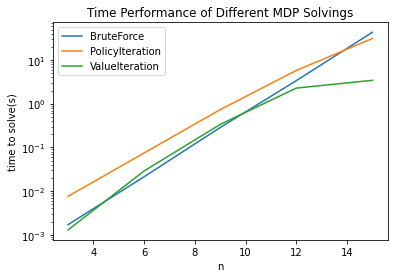

In [ ]:
brute_time = []
policy_time = []
value_time = []

ns = [3,6,9,12,15]

for n in ns:
  #Initialize MDP
  FrogEscapeMDP = FrogMDP(n)

  start = time.time()
  for i in range(2**(n-1)):
    #Create policies
    action_for: Dict[LilyPadState, str] = {}
    for s in range(1, n):
        if i%2:
          action_for[LilyPadState(s)] = 'A'
        else:
          action_for[LilyPadState(s)] = 'B'
        i = i//2
    #Create MRP
    FrogEscapeMRP = FrogEscapeMDP.apply_finite_policy(FiniteDeterministicPolicy(action_for))
    vec = FrogEscapeMRP.get_value_function_vec(gamma=1)
  end = time.time()
  brute_time.append(end-start)

  start = time.time()
  policy_iteration_result(FrogEscapeMDP, 1)
  end = time.time()
  policy_time.append(end-start)

  start = time.time()
  value_iteration_result(FrogEscapeMDP, 1)
  end = time.time()
  value_time.append(end-start)

plt.plot(ns, brute_time, label='BruteForce')
plt.plot(ns, policy_time, label='PolicyIteration')
plt.plot(ns, value_time, label='ValueIteration')
plt.xlabel('n')
plt.ylabel('time to solve(s)')
plt.yscale('log')
plt.title('Time Performance of Different MDP Solvings')
plt.legend()
plt.show()

# 4. Job Hopping

WLOG, let $w_1 \le w_2 \le \dots \le w_{k-1} \le w_0 \le w_{k} \le \cdots \le w_n$.